In [1]:


from auditory_stimulation.audio import load_wav_as_numpy_array, Audio
from auditory_stimulation.auditory_tagging.assr_tagger import AMTagger, FlippedFMTagger, FMTagger
from auditory_stimulation.auditory_tagging.auditory_tagger import AAudioTagger
from auditory_stimulation.auditory_tagging.noise_tagging_tagger import NoiseTaggingTagger
from auditory_stimulation.auditory_tagging.shift_sum_tagger import ShiftSumTagger
from auditory_stimulation.auditory_tagging.tag_generators import sine_signal
from auditory_stimulation.view.sound_players import psychopy_player

pygame 2.5.2 (SDL 2.28.2, Python 3.8.18)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def do_analysis(tagger: AAudioTagger, audio: Audio, play_audio: bool = True) -> None:
    modified = tagger.create()

    if play_audio:
        #psychopy_player(audio)
        #time.sleep(3)
        psychopy_player(modified)

    plt.figure(figsize=(20, 10))
    plt.plot(audio.array[:, 0])
    plt.plot(modified.array[:, 0])
    plt.show()

    modified_spectrum = np.abs(
        np.fft.fftshift(np.fft.fft(modified.array[2 * audio.sampling_frequency: 6 * audio.sampling_frequency, 1])))
    original_spectrum = np.abs(
        np.fft.fftshift(np.fft.fft(audio.array[2 * audio.sampling_frequency: 6 * audio.sampling_frequency, 1])))

    frequency_multiplier = audio.sampling_frequency / modified_spectrum.shape[0]

    plt.figure(figsize=(20, 10))
    step = 800
    plt.xticks(range(0, 10000, step), range(0, int(frequency_multiplier * 10000), int(step * frequency_multiplier)))

    plt.plot(original_spectrum[len(original_spectrum) // 2: len(original_spectrum) // 2 + 10000])
    plt.plot(modified_spectrum[len(modified_spectrum) // 2: len(modified_spectrum) // 2 + 10000])

    plt.show()

    plt.figure(figsize=(20, 10))
    step = 80
    plt.xticks(range(0, 1000, step), range(0, int(frequency_multiplier * 1000), int(step * frequency_multiplier)))

    plt.plot(original_spectrum[len(original_spectrum) // 2: len(original_spectrum) // 2 + 1000])
    plt.plot(modified_spectrum[len(modified_spectrum) // 2: len(modified_spectrum) // 2 + 1000])

    plt.show()


In [4]:
audio = load_wav_as_numpy_array("../stimuli_sounds/test.wav")
# audio = load_wav_as_numpy_array("../stimuli_sounds/440.wav")

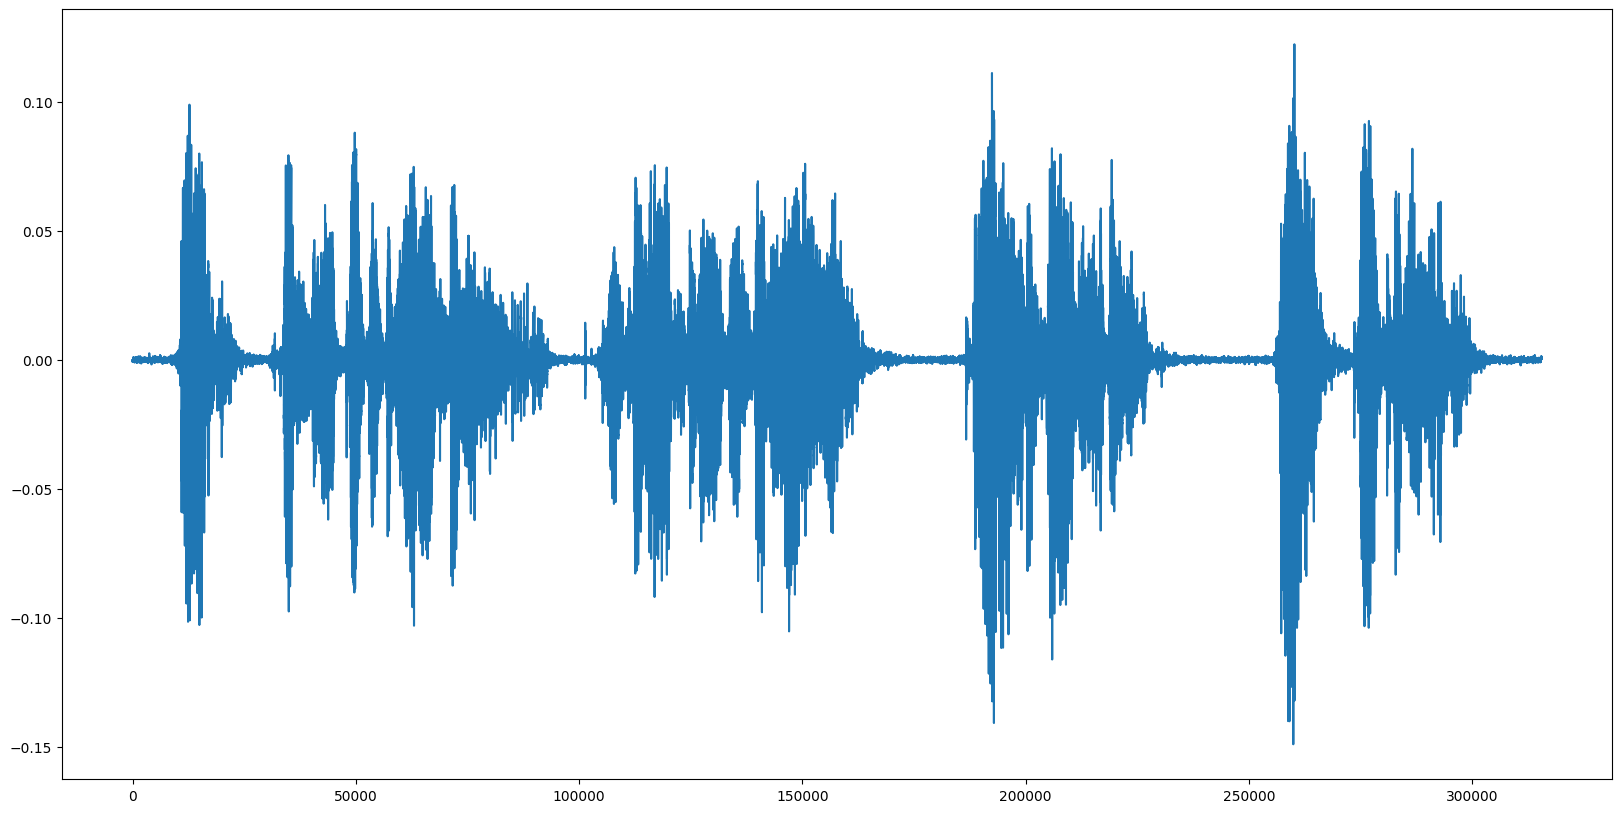

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(audio.array[:, 0])
plt.show()

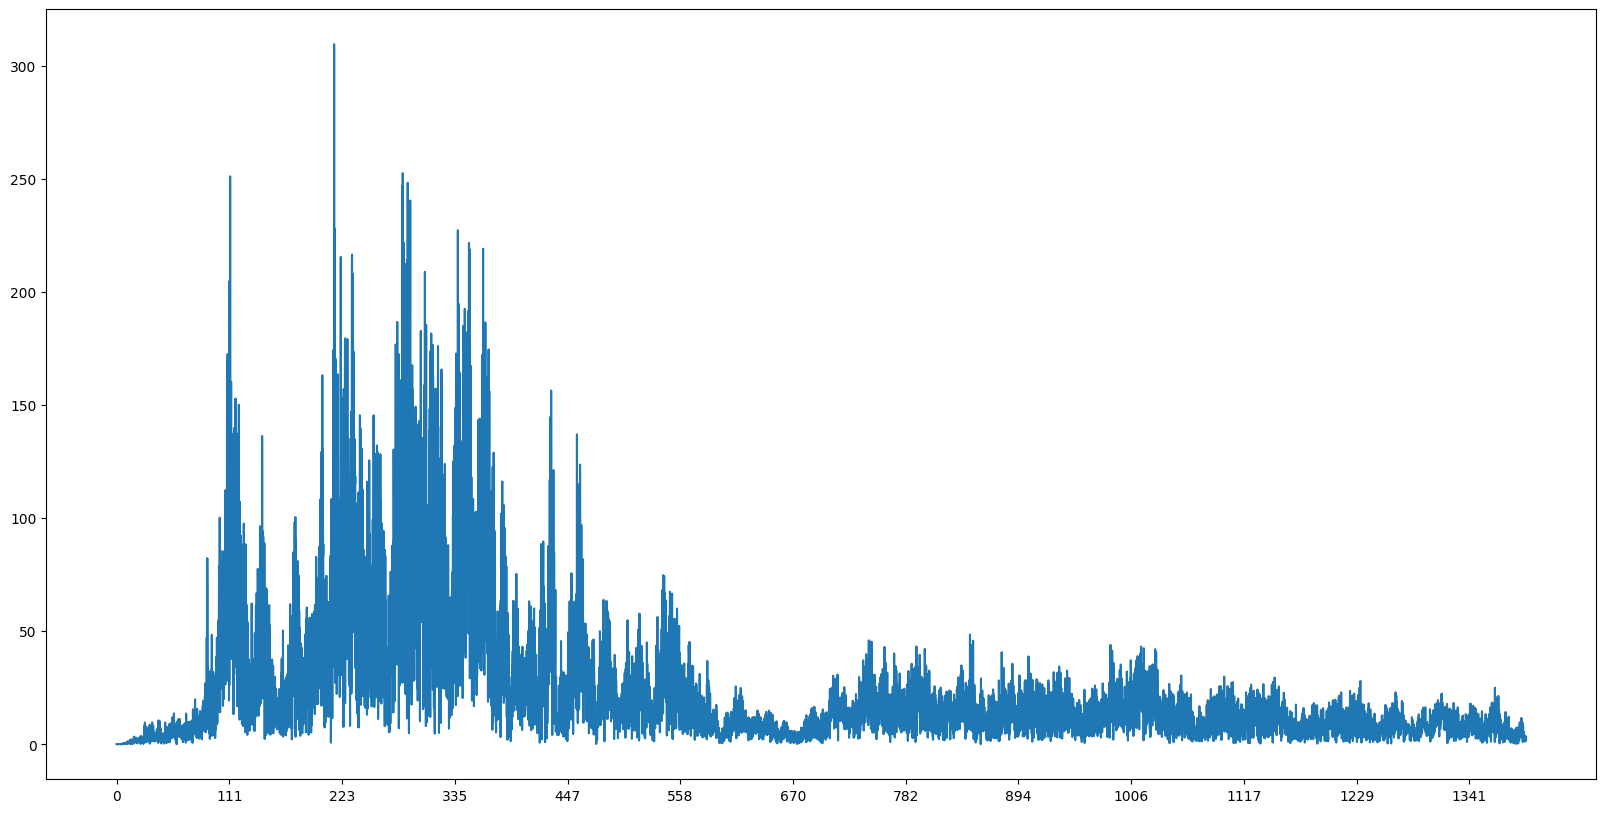

In [6]:
plt.figure(figsize=(20, 10))

frequency_multiplier = audio.sampling_frequency / audio.array.shape[0]
step = 800
original = range(0, 10000, step)
modified = [int(ele * frequency_multiplier) for ele in original]
plt.xticks(original, modified)

plt.plot(
    np.abs(
        np.fft.fftshift(np.fft.fft(audio.array[:, 0]))[audio.array.shape[0] // 2: audio.array.shape[0] // 2 + 10000]))
plt.show()

In [7]:
stimulus_am = AMTagger(audio,
                       [(0, 6)],
                       #63,
                       100,
                       sine_signal)

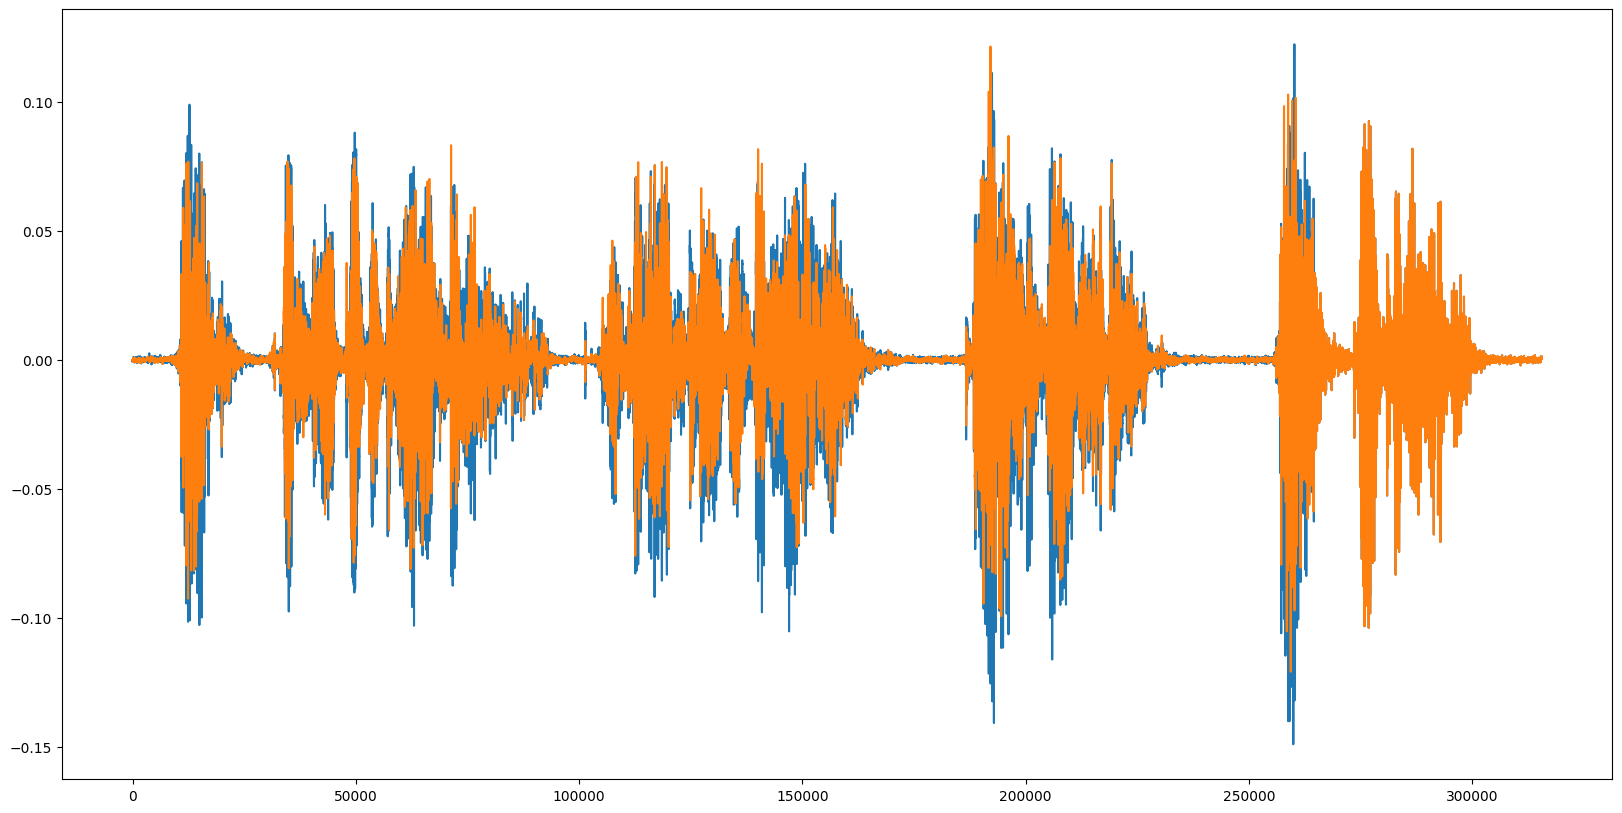

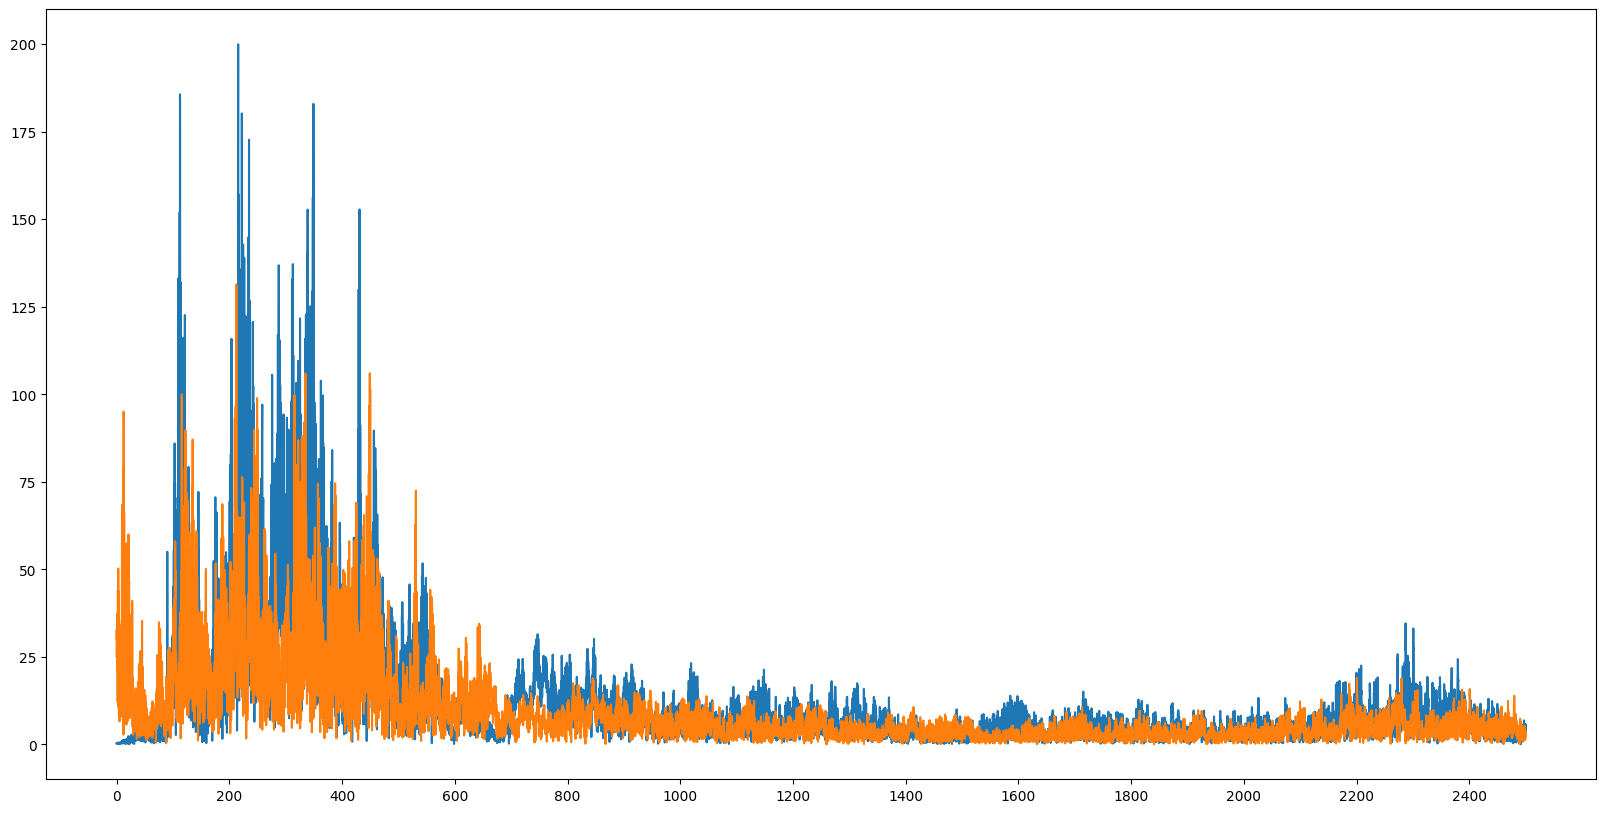

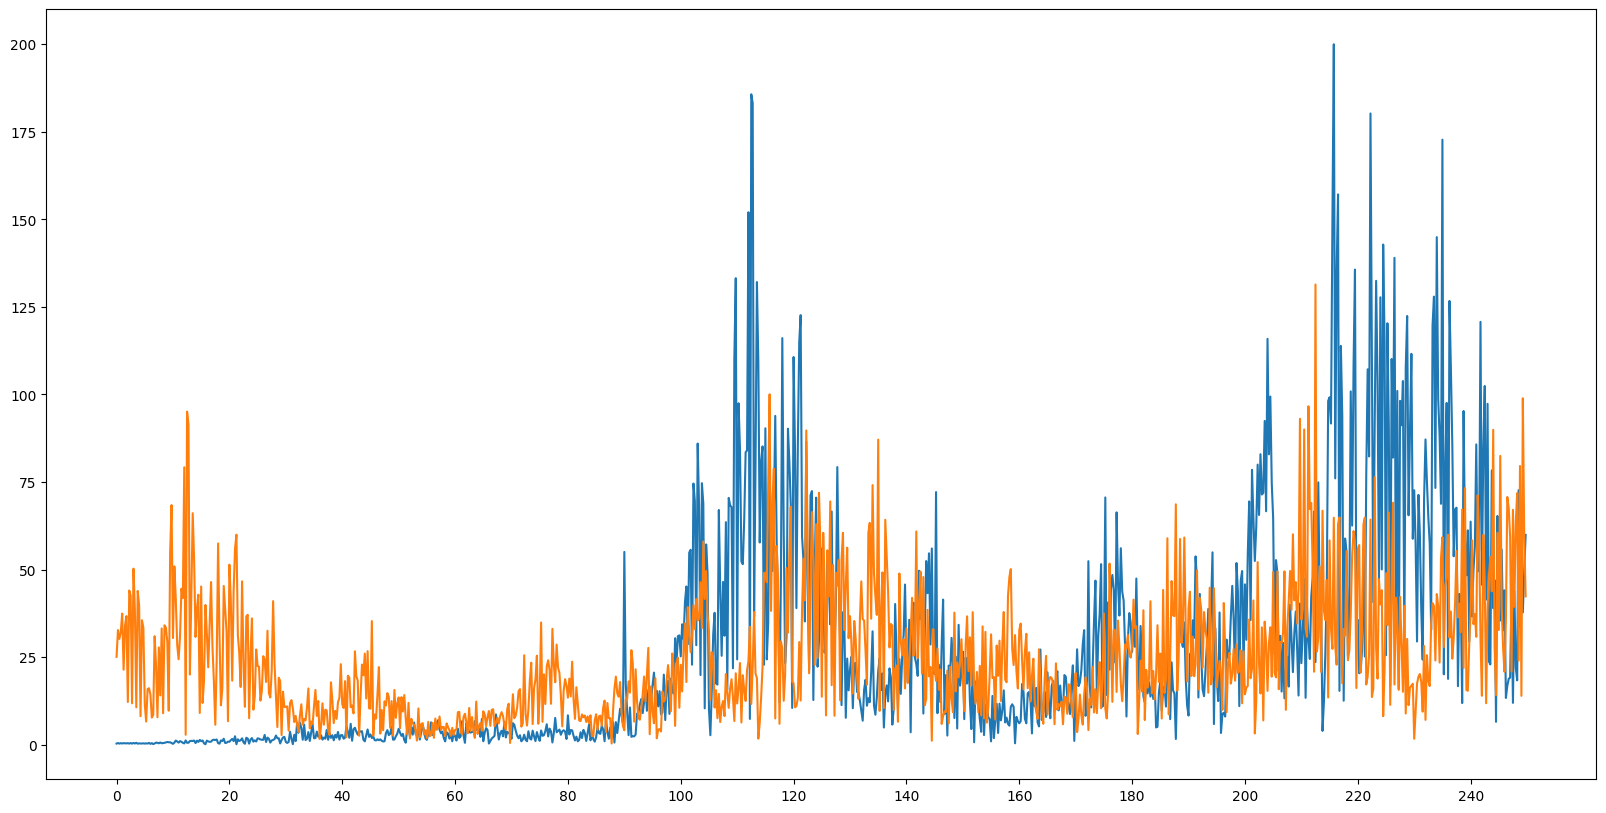

In [8]:
do_analysis(stimulus_am, audio)



In [9]:
stimulus_noise = NoiseTaggingTagger(audio,
                                    [(2, 6)],
                                    140,
                                    255)

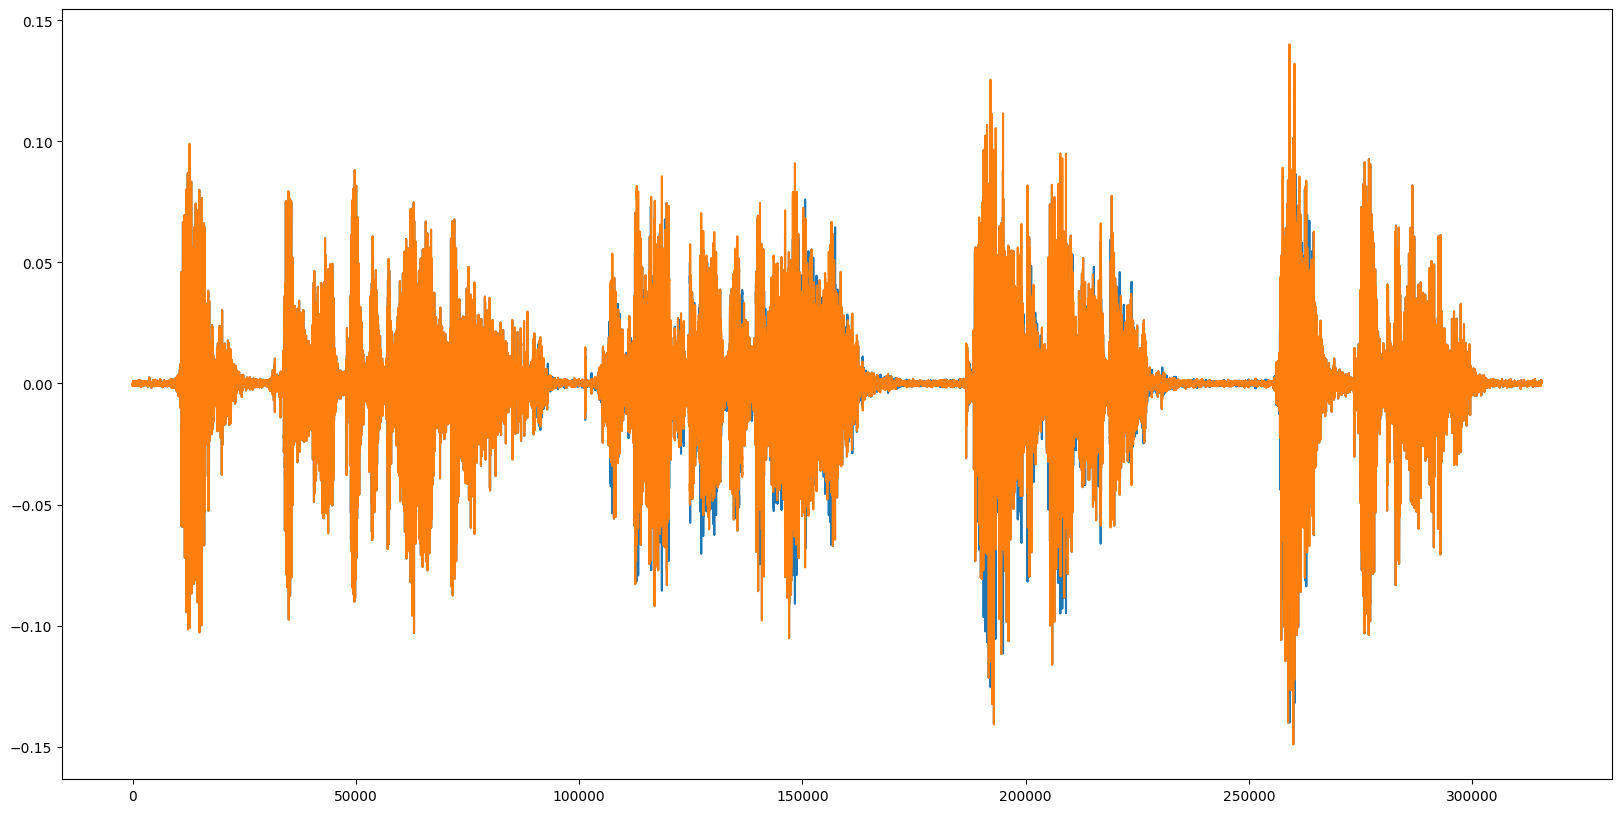

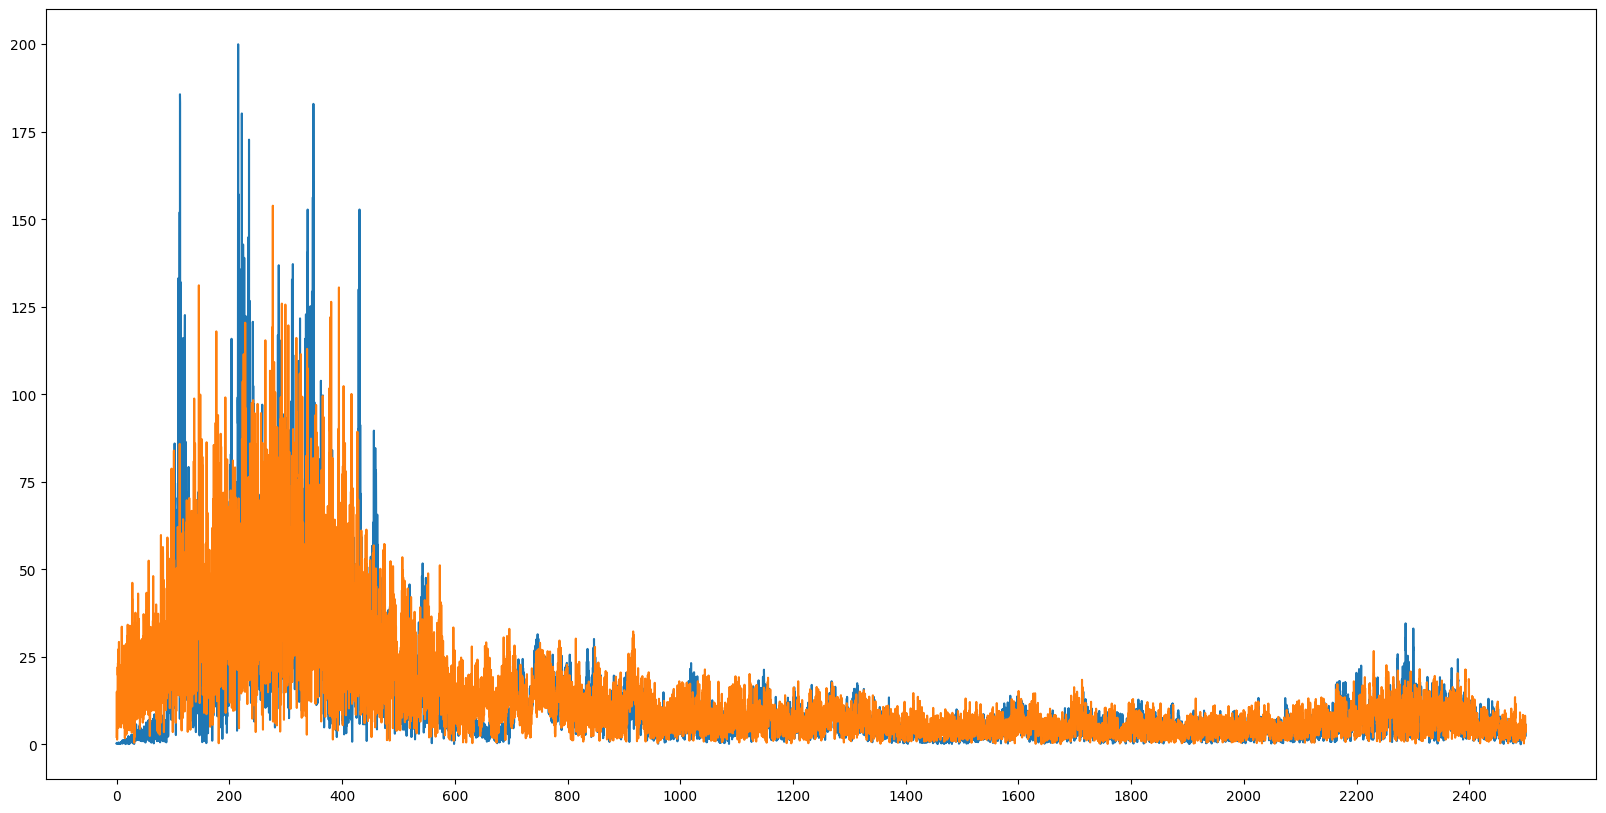

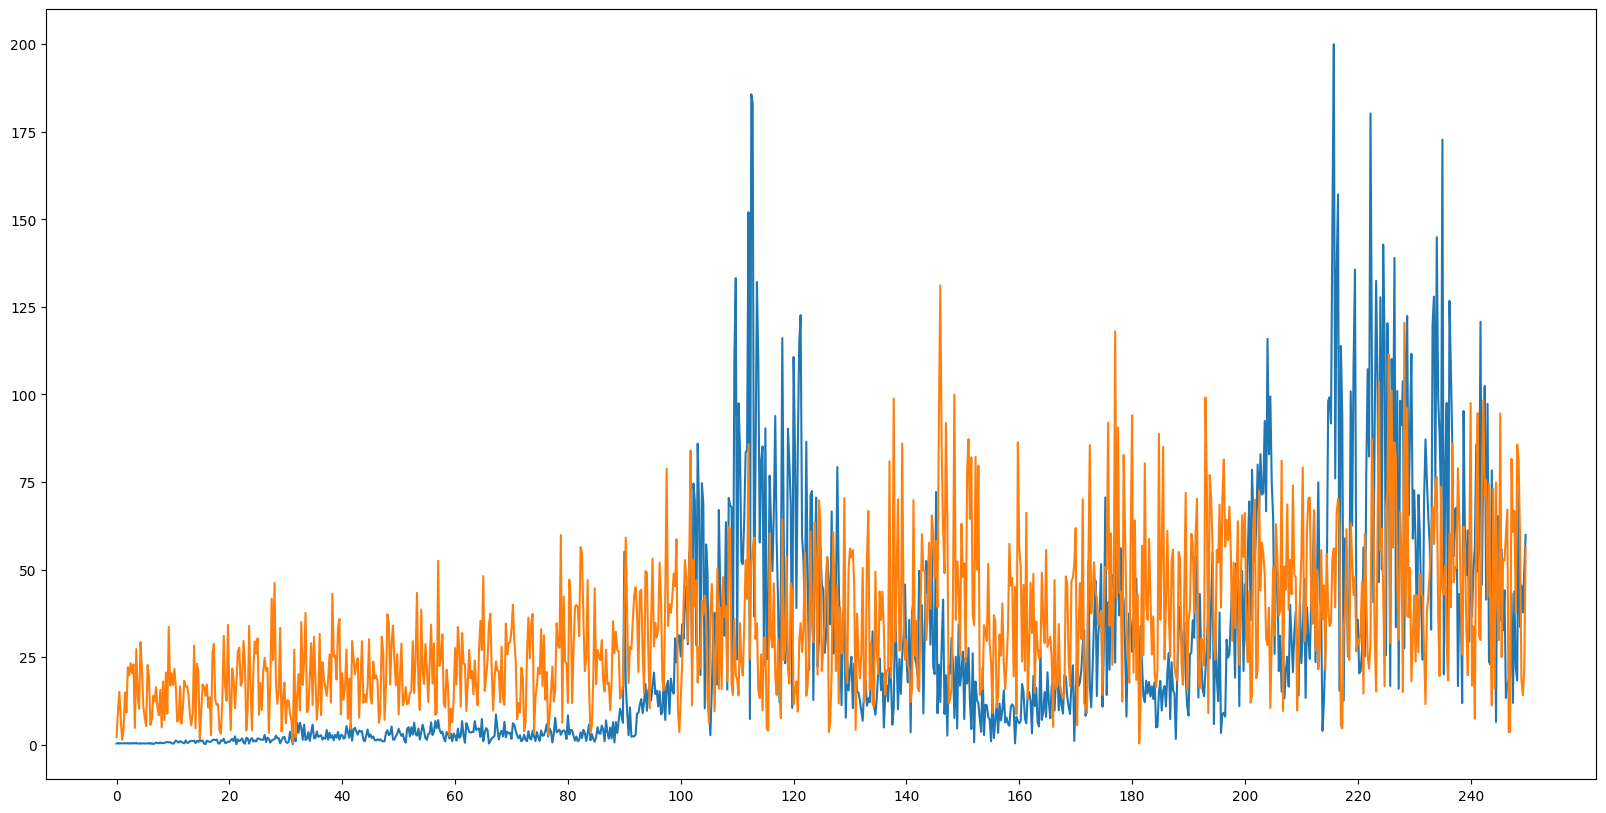

In [10]:
do_analysis(stimulus_noise, audio)

In [11]:
stimulus_flipped_fm = FlippedFMTagger(audio,
                                      [(2, 6)],
                                      #63,
                                      42)

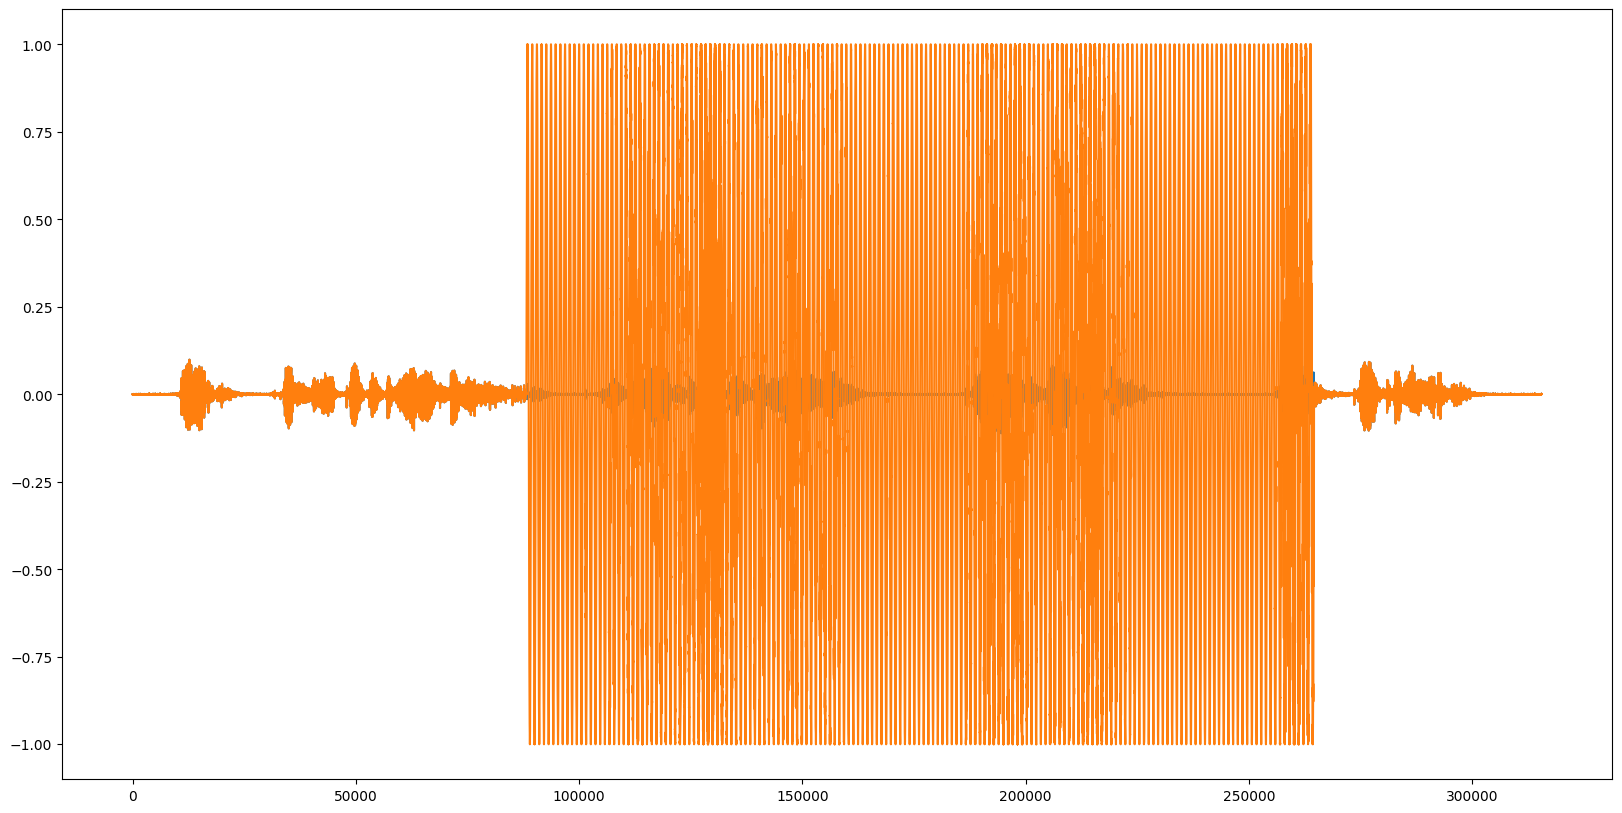

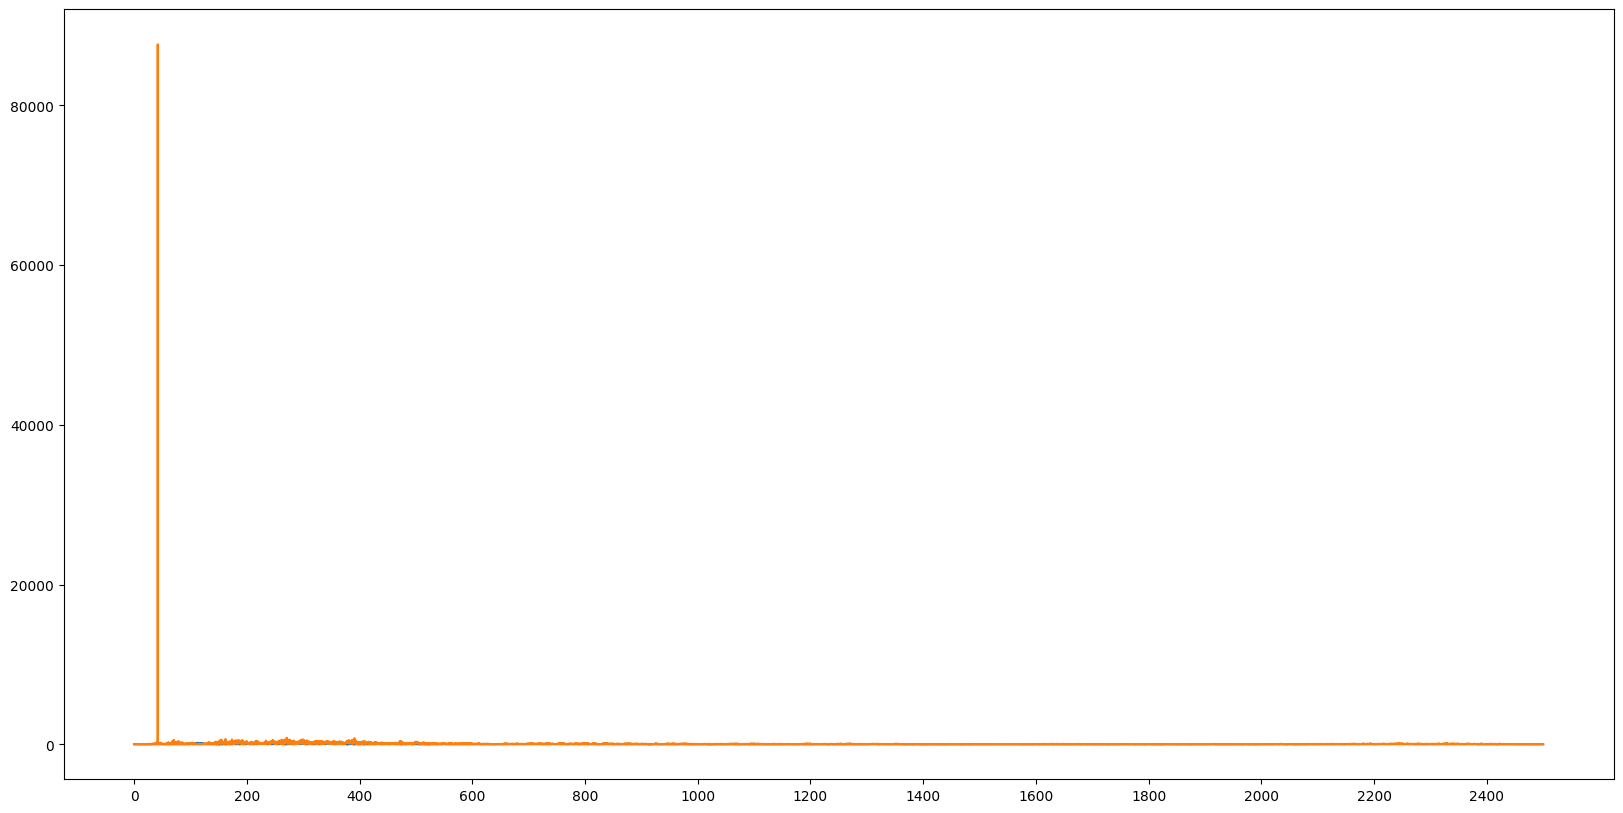

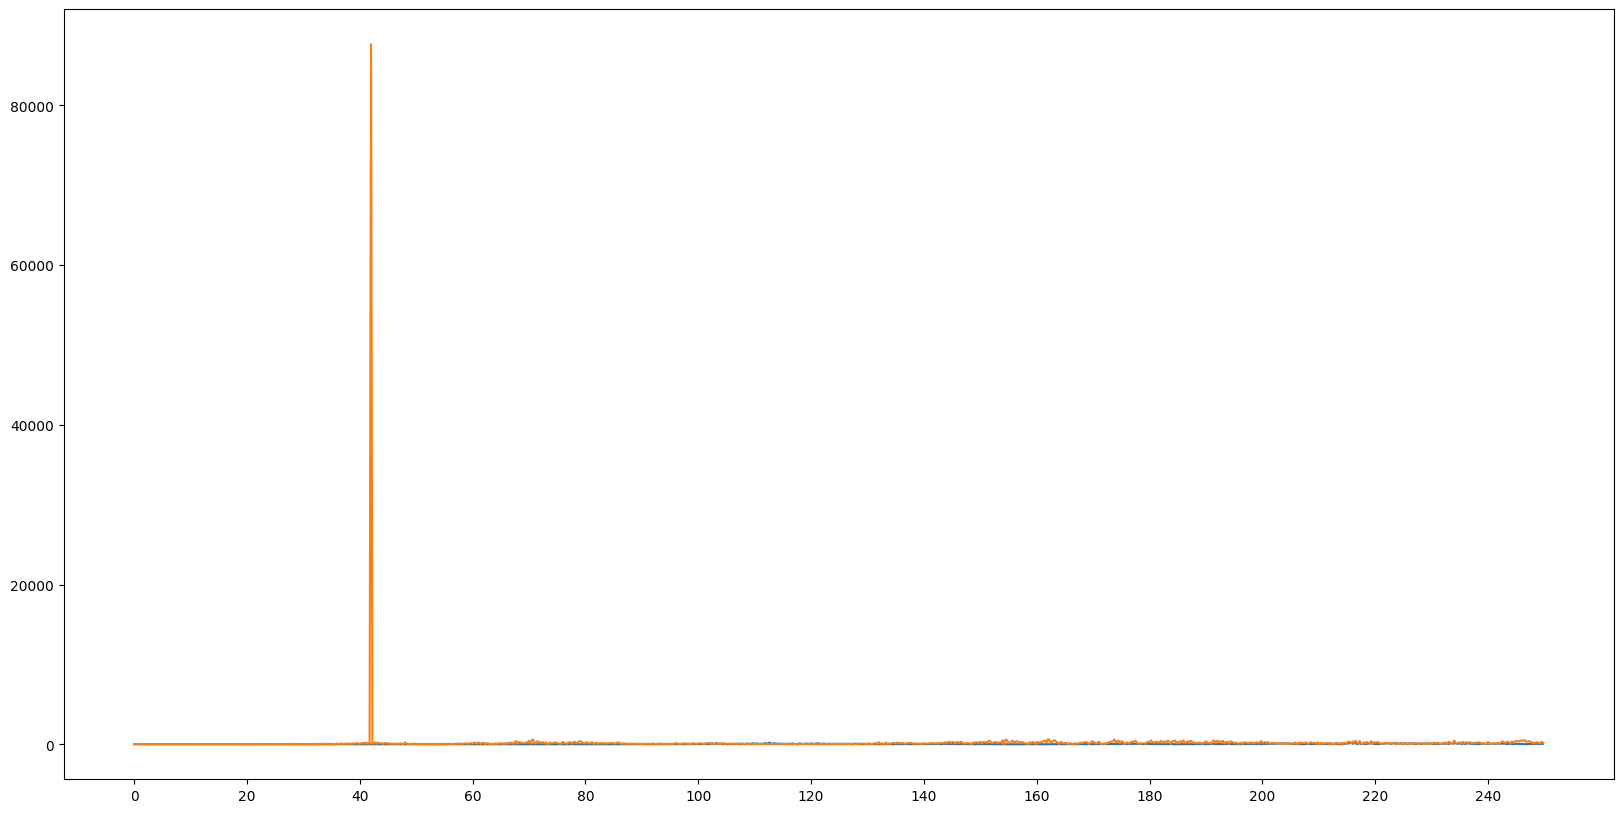

In [12]:
do_analysis(stimulus_flipped_fm, audio)

In [13]:
stimulus_shift_sum = ShiftSumTagger(audio,
                                    [(2, 6)],
                                    1000)

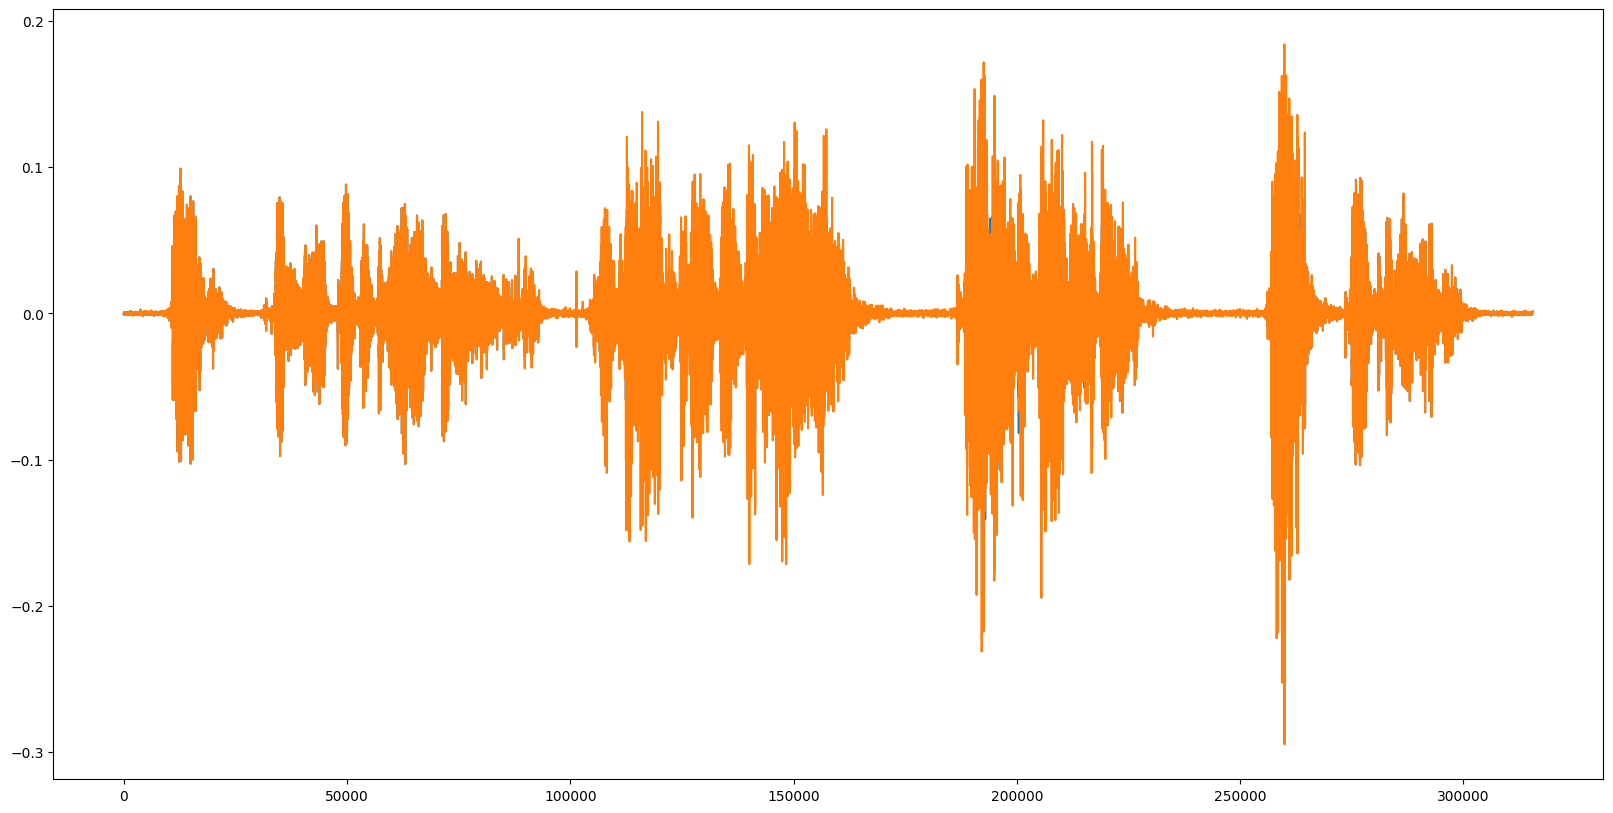

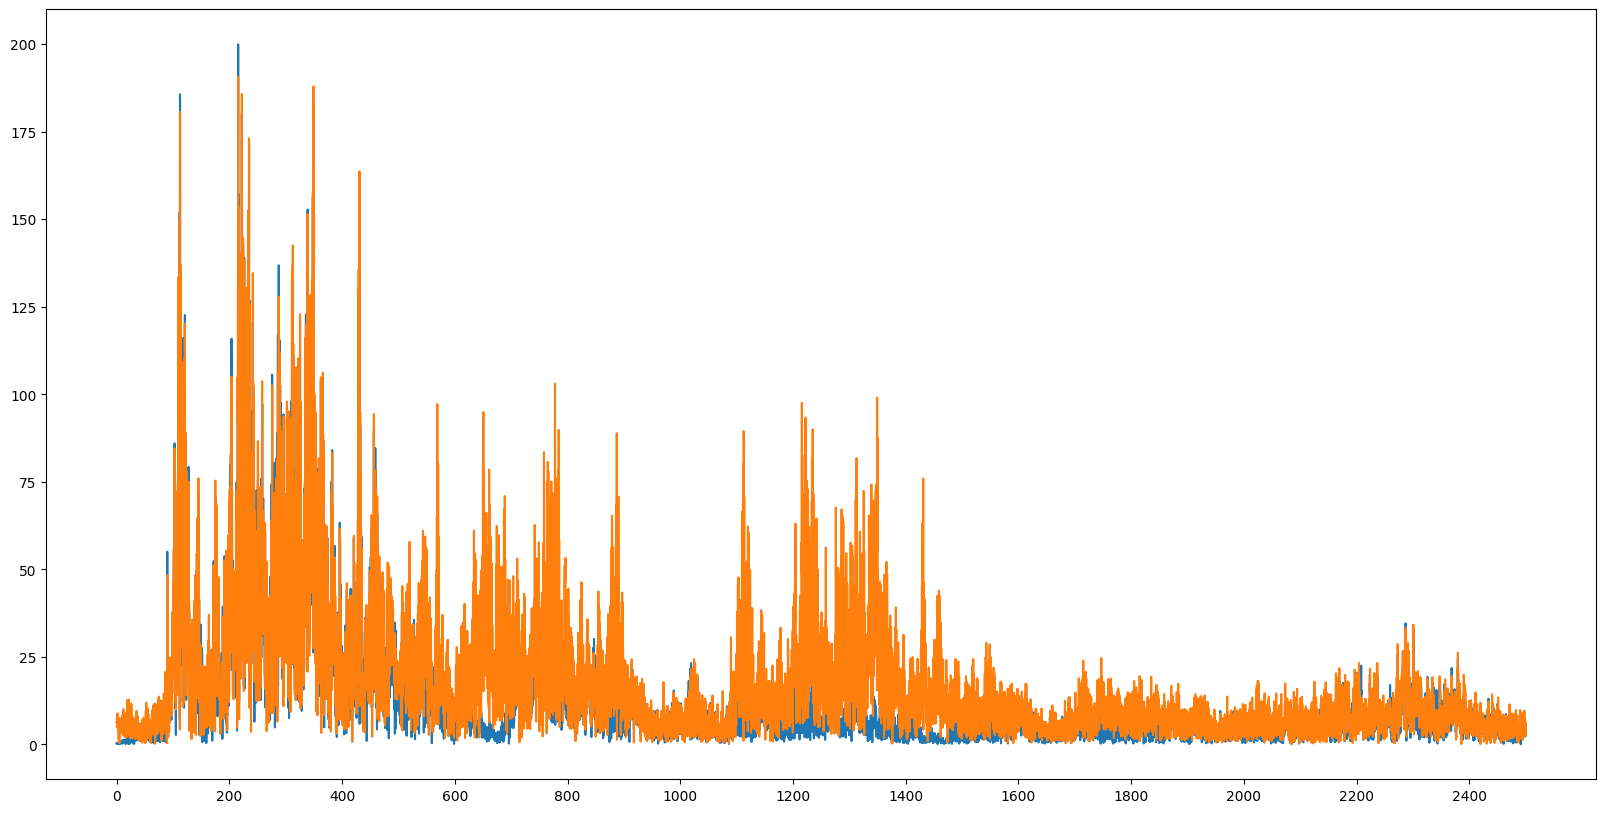

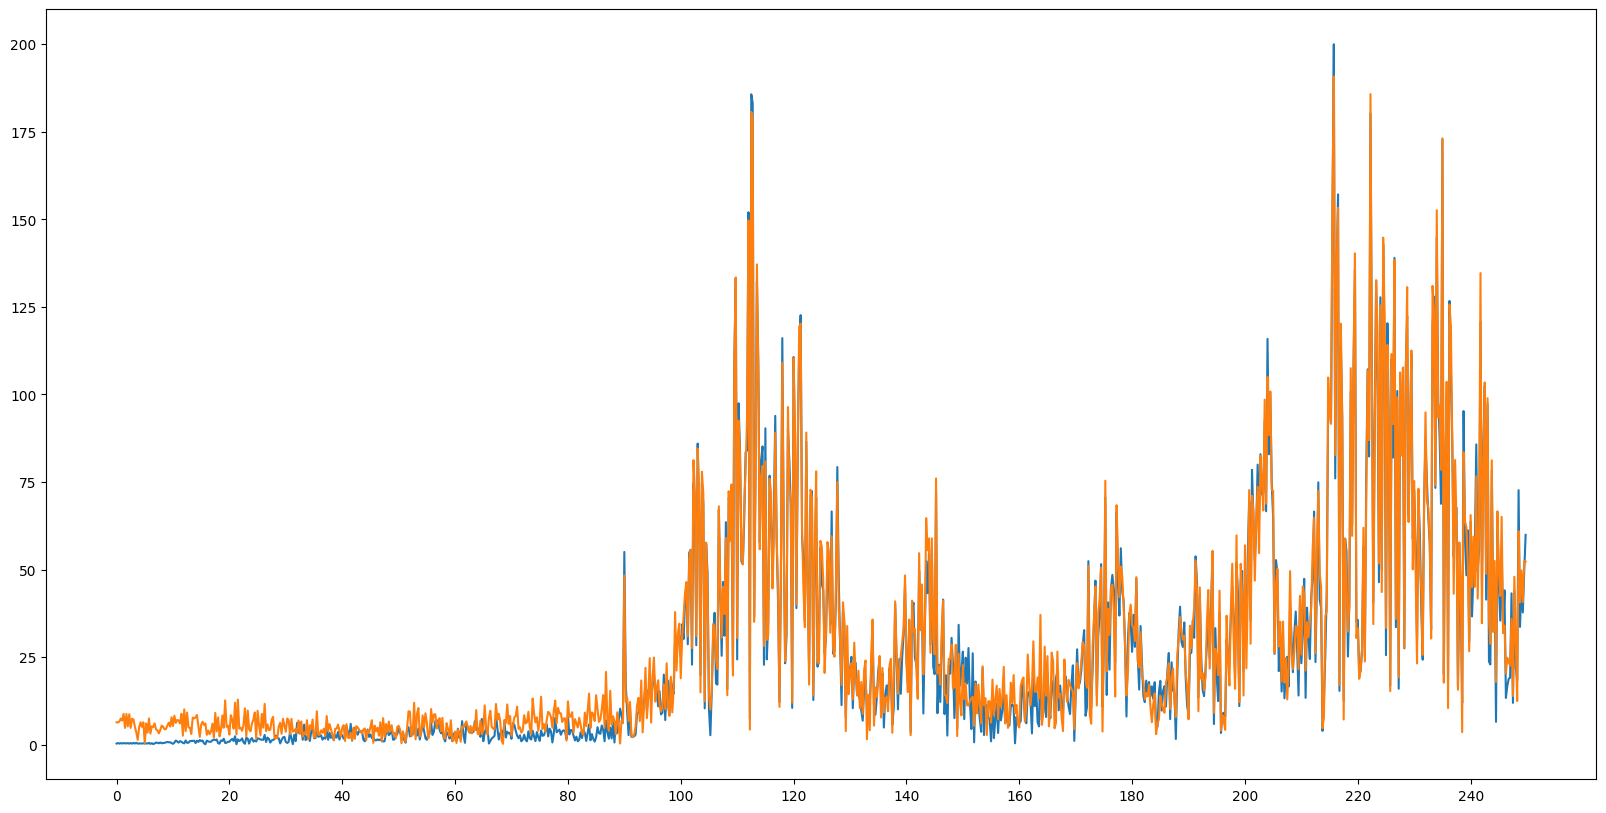

In [14]:
do_analysis(stimulus_shift_sum, audio)

In [15]:
stimulus_fm = FMTagger(audio,
                       [(0, 6)],
                       40)

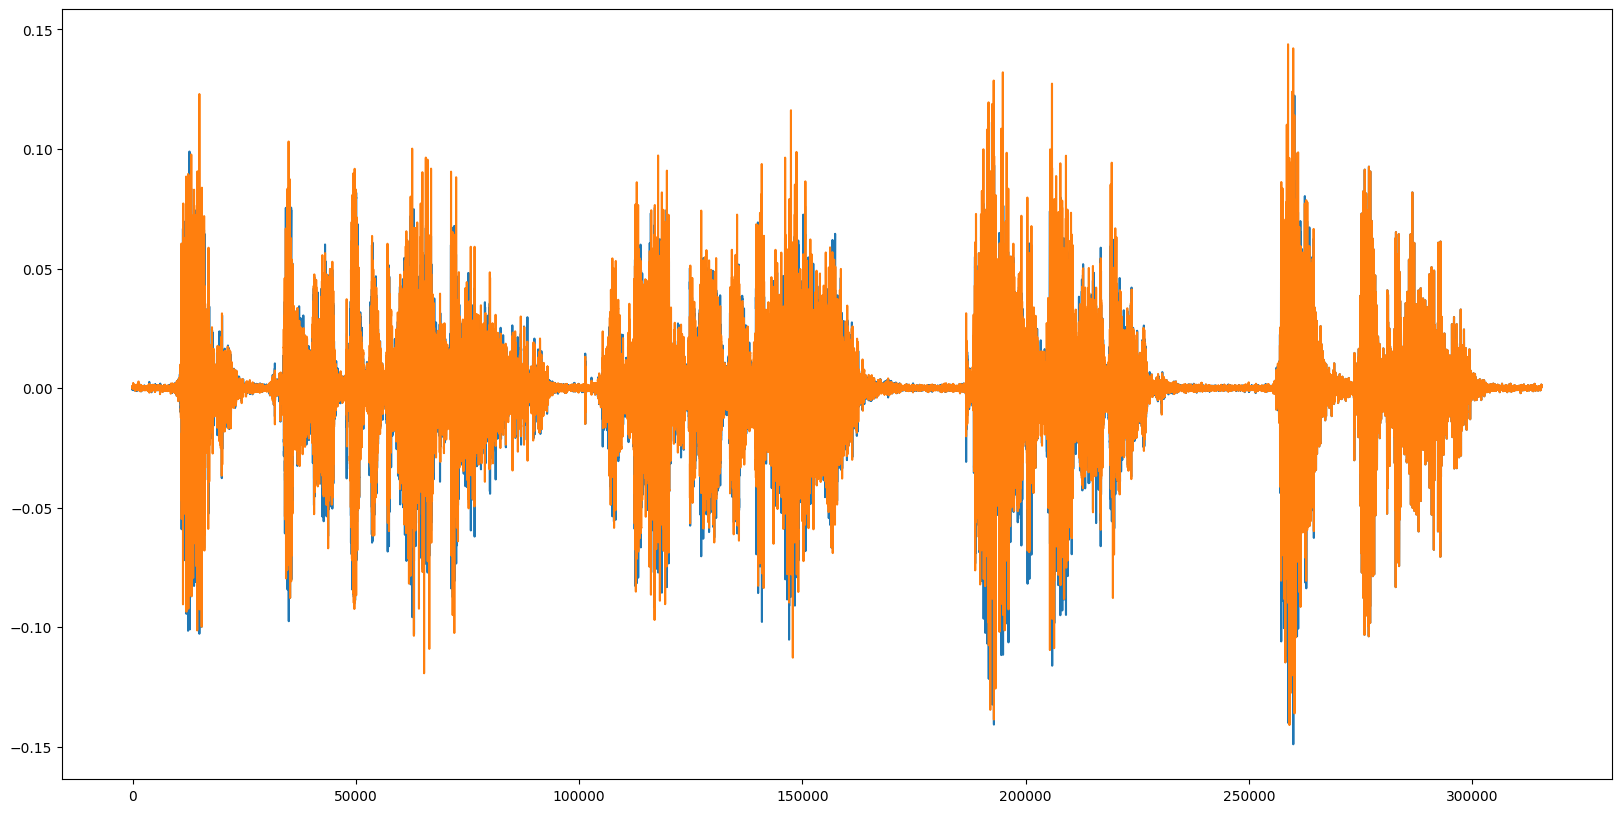

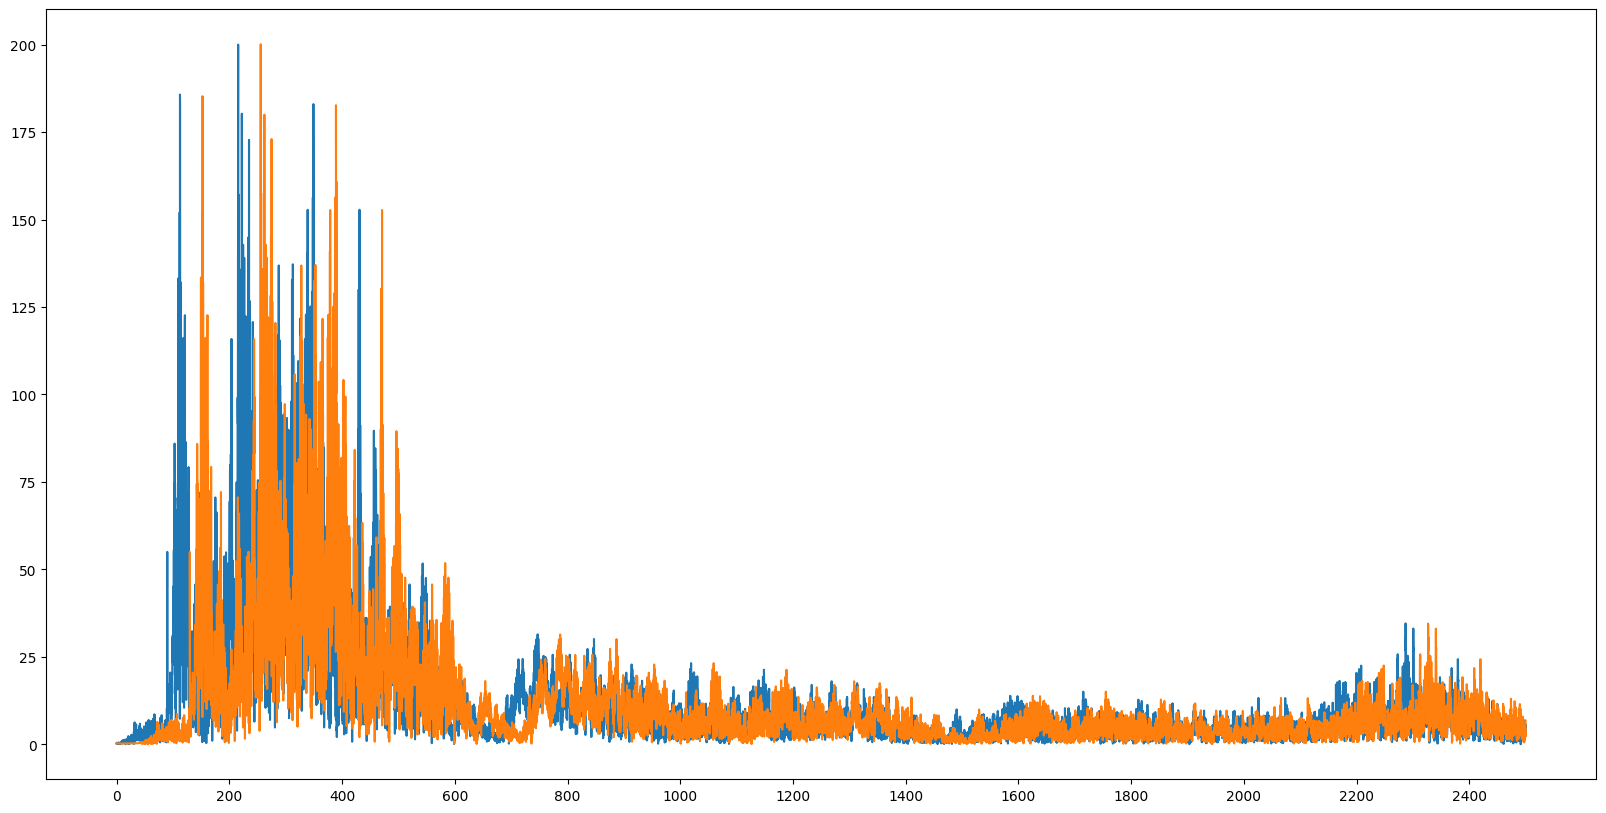

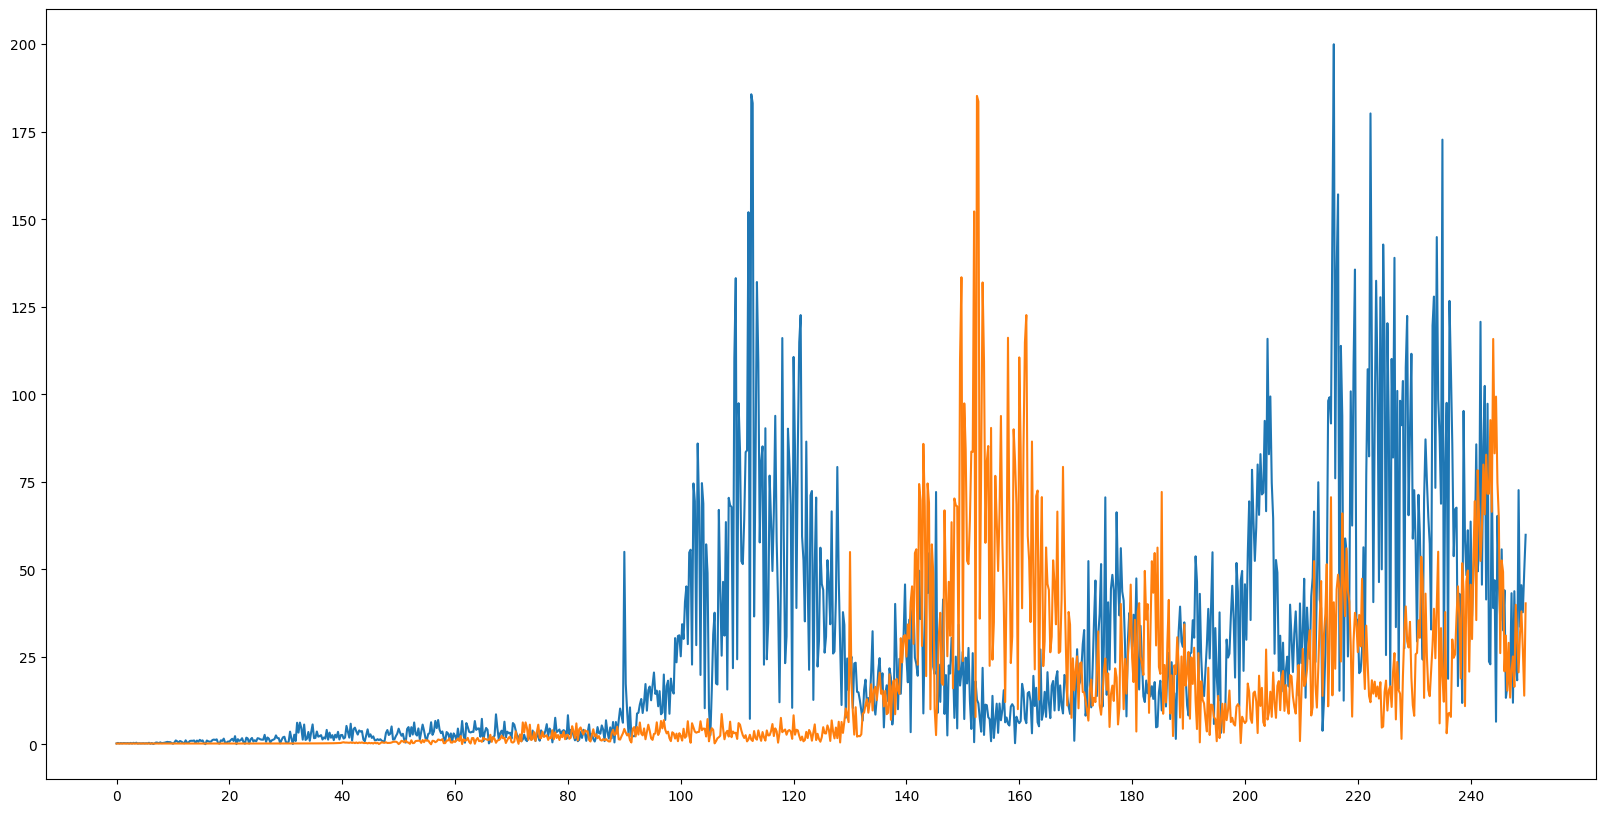

In [16]:
do_analysis(stimulus_fm, audio)